In [17]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt

from scipy.stats import kruskal

In [18]:
sns.set_style("whitegrid")

### Load data

In [19]:
baseline = dict({
    "accuracy": 0.2501,
    "kappa": 0.0174,
    "f1-score": 0.1717
})

metrics = ["accuracy", "kappa", "f1-score"]
boxplot_kwargs = {'boxprops': dict(alpha=0.5), 'fliersize': 3}

In [20]:
def add_local_all(df):
    local_rows = df[df['mode'].str.contains('TMA|spl')].copy()
    local_rows['mode'] = 'z_local_all'
    df = pd.concat([df, local_rows], ignore_index=True)
    return df

In [21]:
equal_df = add_local_all(pd.read_csv(os.path.join("data", "equal_splits_c2_epoch500.csv")))
nonIID_df = add_local_all(pd.read_csv(os.path.join("data", "unequal_splits_10_45_45_c2_epoch500.csv")))
TMA_df = add_local_all(pd.read_csv(os.path.join("data", "SGD_TMA_c5_epoch500.csv")))

### compare centralized, federated and local for all splits

/tmp/ipykernel_100172/4032990437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='mode', y=metric, data=df, ax=ax, palette=custom_colors, edgecolor="gray", linewidth=0.2, size=2)
/tmp/ipykernel_100172/4032990437.py:10: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(x='mode', y=metric, data=df, ax=ax, palette=custom_colors, edgecolor="gray", linewidth=0.2, size=2)
/tmp/ipykernel_100172/4032990437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='mode', y=metric, data=df, ax=ax, palette=custom_colors, edgecolor="gray", linewidth=0.2, size=2)
/tmp/ipykernel_100172/4032990437.py:10: Fut

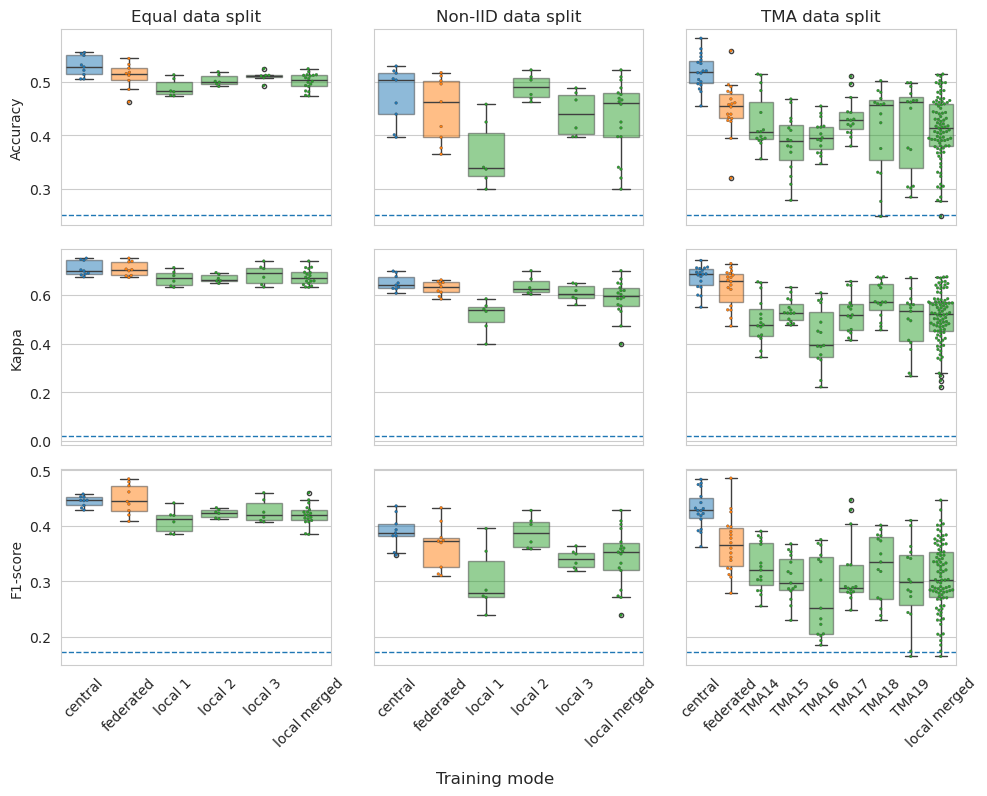

In [22]:
def plot_supp1(df, ax, metric, mode=""):
    if mode == "TMA":
        custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#2ca02c", "#2ca02c", "#2ca02c", "#2ca02c", "#2ca02c", "#2ca02c"]
    else:
        custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#2ca02c", "#2ca02c", "#2ca02c"]
            
    sns.boxplot(x='mode', y=metric, dodge=True, data=df, ax=ax, **boxplot_kwargs)
    for i, patch in enumerate(ax.patches):
        patch.set_facecolor(custom_colors[i])
    sns.swarmplot(x='mode', y=metric, data=df, ax=ax, palette=custom_colors, edgecolor="gray", linewidth=0.2, size=2)

    ax.axhline(baseline[metric], linestyle="--", linewidth=1)
    ax.set_xlabel("")
    ax.set_xticklabels([])

def create_suppfigure1(upper_df, middle_df, lower_df):
    fig, axes = plt.subplots(3, 3, figsize=(10, 8), sharey="row")
    for i, metric in enumerate(metrics):
        plot_supp1(upper_df, axes[i][0], metric)
        plot_supp1(middle_df, axes[i][1], metric)
        plot_supp1(lower_df, axes[i][2], metric, mode="TMA")

        axes[i][0].set_ylabel(f"{metric.capitalize()}")

    axes[0][0].set_title("Equal data split")
    axes[0][1].set_title("Non-IID data split")
    axes[0][2].set_title("TMA data split")
    
    axes[2][0].set_xticklabels(["central", "federated", "local 1", "local 2", "local 3", "local merged"], rotation=45)
    axes[2][1].set_xticklabels(["central", "federated", "local 1", "local 2", "local 3", "local merged"], rotation=45)
    axes[2][2].set_xticklabels(["central", "federated", "TMA14", "TMA15", "TMA16", "TMA17", "TMA18", "TMA19", "local merged"], rotation=45)
    
    fig.supxlabel("Training mode")
    plt.tight_layout()
    plt.savefig(os.path.join("figures", "Supp_Figure1.png"), dpi=300)

create_suppfigure1(equal_df, nonIID_df, TMA_df)

In [42]:
perc_diffs = list()
for m in metrics:
    cl1 = nonIID_df[nonIID_df["mode"] == "spl_1"][m].mean()
    cl2 = nonIID_df[nonIID_df["mode"] == "spl_2"][m].mean()
    cl3 = nonIID_df[nonIID_df["mode"] == "spl_3"][m].mean()

    perc_diffs.append((cl2 - cl1) / cl2 * 100)
    perc_diffs.append((cl3 - cl1) / cl3 * 100)

print(perc_diffs)

print(f"Local models trained on cohort 1 perform on average between {round(min(perc_diffs))}% and {round(max(perc_diffs))}% worse.")

[25.962891910655976, 17.54731131447395, 19.38920161399233, 15.51262641453531, 21.943636640116388, 11.014197175264274]
Local models trained on cohort 1 perform on average between 11 and 26 worse.


/tmp/ipykernel_100172/607811175.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2][0].set_xticklabels(["central", "federated", "local 1", "local 2", "local 3", "local merged"], rotation=45)
/tmp/ipykernel_100172/607811175.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2][1].set_xticklabels(["central", "federated", "local 1", "local 2", "local 3", "local merged"], rotation=45)
/tmp/ipykernel_100172/607811175.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2][2].set_xticklabels(["central", "federated", "TMA14", "TMA15", "TMA16", "TMA17", "TMA18", "TMA19", "local merged"], rotation=45)


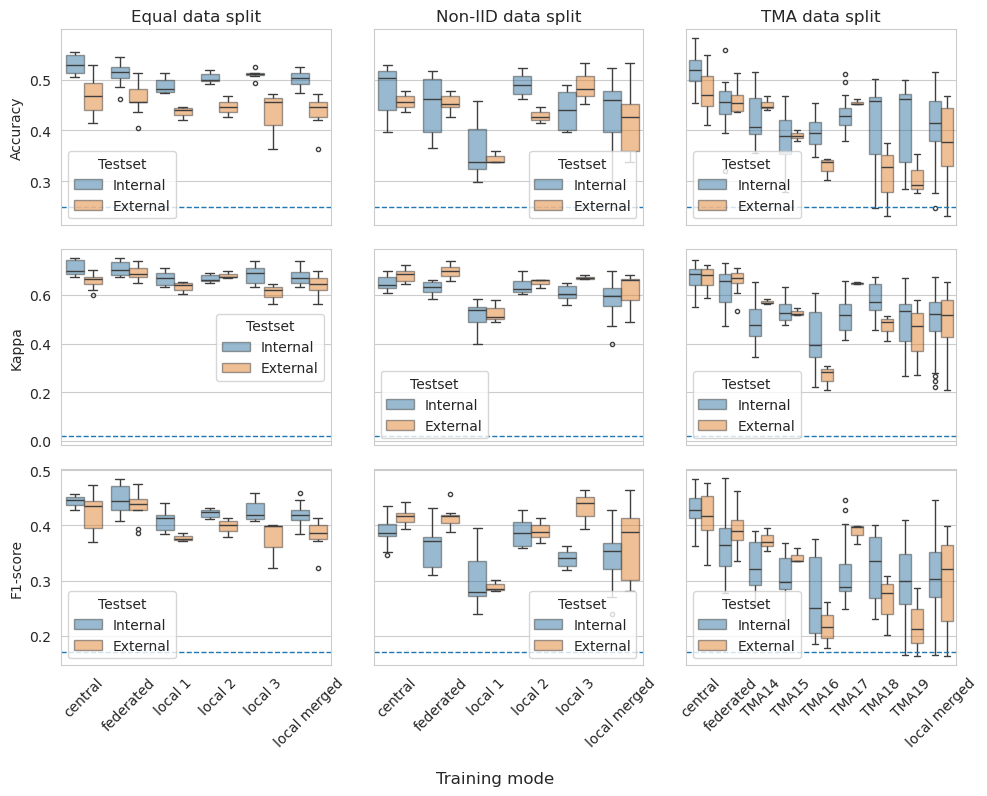